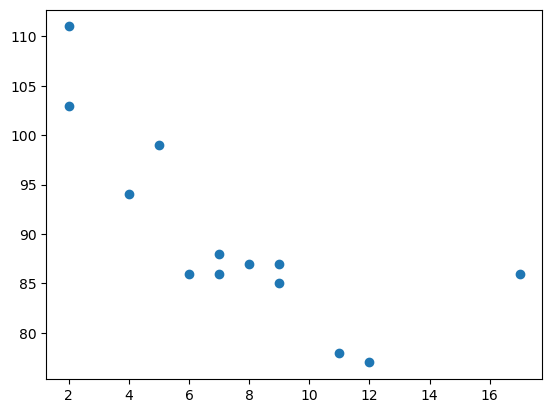

In [1]:
import matplotlib.pyplot as plt

x=[5,7,8,7,2,17,2,9,4,11,12,9,6]
y=[99,86,87,88,111,86,103,87,94,78,77,85,86]

plt.scatter(x, y)
plt.show()

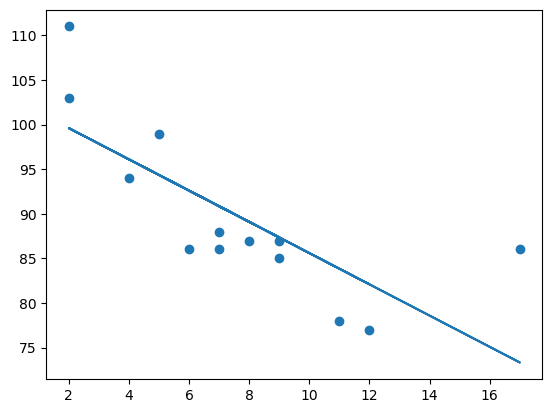

In [2]:
from scipy import stats

# crete an array that represent the values of the x and y axis
x=[5,7,8,7,2,17,2,9,4,11,12,9,6]
y=[99,86,87,88,111,86,103,87,94,78,77,85,86]

#Execute a method that returns sme important key values of Linear Regression
slope,intercept,r,p,std_err = stats.linregress(x,y)

'''
Crete a function that uses a slope and intercept values to return a new value
THis new value represent where on the y axis the corresponding x value will be placed
'''
def myfunc(x):
    return slope * x + intercept

mymodel =list(map(myfunc,x))
#draw the original scatter plot
plt.scatter(x, y)
#Draw the line of Linear Regression
plt.plot(x,mymodel)

plt.show()

In [3]:
print(r)

-0.758591524376155


In [4]:
# Linear Regression Implementation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("Advertising.csv")
dataset.head(15)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [5]:
#Dropping the unnecessary columns
dataset.drop(columns=["radio","newspaper"],
            inplace = True)
dataset.head()

,Unnamed: 0,TV,sales
0,1,230.1,22.1
1,2,44.5,10.4
2,3,17.2,9.3
3,4,151.5,18.5
4,5,180.8,12.9


In [6]:
x =dataset[["TV"]]
y =dataset["sales"]

#Splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3, random_state =100)

In [7]:
#Fitting the Linear Regresssion Model
from sklearn.linear_model import LinearRegression
slr =LinearRegression()
slr.fit(x_train,y_train)

LinearRegression()

In [8]:
#intercept and Coefficient
print("Intercept: ",slr.intercept_)
print("Coefficient: ",slr.coef_)

Intercept:  6.989665857411681
Coefficient:  [0.04649736]


In [9]:
#Prediction of Test set
y_pred_slr = slr.predict(x_test)
print("Prediction for test set: {}".format(y_pred_slr))

Prediction for test set: [ 7.35234526 18.06533671 13.27610876 17.11214086 18.22807747 16.60531965
 13.4620982  16.17754395 17.05169429 17.07029323 12.4391563  17.66080969
  9.60281742 15.72186983 11.04423554 11.36971705 13.95032046 14.90351632
 14.59198401 12.23921766 16.97264878 13.00642408 16.07524976 15.21969836
 15.58702749 17.23303399 17.20978531 10.49091697 15.58702749 12.71349072
 10.1700852  10.19798361 12.61584627 15.74976825  9.31453379 12.59259759
 11.50920913 14.81982107 17.33067844 15.97295557 17.00519693 15.15925179
 14.63848137 17.14933874 12.57864838 11.16047894  7.77547122 18.55820871
 10.27237939  8.76586496 16.405381   14.95466341 10.4816175  13.08546959
 16.78665935  9.05879832  7.78942043  8.17999824 16.17754395 10.9744895 ]


In [10]:
import pandas as pd
y_pred_slr = slr.predict(x_test)
#Actual value and predicted value
slr_diff =pd.DataFrame({"Actual Value " : y_test,
                        "Predicted Value " : y_pred_slr })
slr_diff.head()

,Actual Value,Predicted Value
126,6.6,7.352345
104,20.7,18.065337
99,17.2,13.276109
92,19.4,17.112141
111,21.8,18.228077


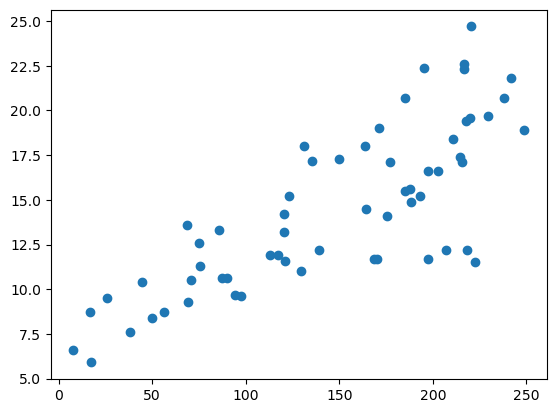

In [11]:
plt.scatter(x_test,y_test)

In [12]:
#Model Evaluation

from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test,y_pred_slr)
meanSqErr = metrics.mean_squared_error(y_test,y_pred_slr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test,y_pred_slr))
print("R squared: {:.2f}".format(slr.score(x,y)*100))
print("Mean Absollute Error: ",meanAbErr)
print("Mean Squared Error: ",meanSqErr)
print("Root Mean Squared Error: ",rootMeanSqErr)

R squared: 61.02
Mean Absollute Error:  2.161984932672072
Mean Squared Error:  7.975798532854849
Root Mean Squared Error:  2.8241456288327007


In [13]:
dataset = pd.read_csv("Advertising.csv")
x =dataset[["TV","radio","newspaper"]]
y =dataset["sales"]

In [14]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.3, random_state =100)

In [15]:
mlr =LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [16]:
print("Intercept: ",mlr.intercept_)
print("Coefficient: ")
list(zip(x,mlr.coef_))

Intercept:  2.6527896688794996
Coefficient: 


[('TV', np.float64(0.04542559602399794)),
 ('radio', np.float64(0.18975772766893614)),
 ('newspaper', np.float64(0.0046030789531119965))]

In [17]:
y_pred_mlr = mlr.predict(x_test)
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [10.62160072 20.00625302 16.91850882 19.17040746 20.94974131 13.12284284
 11.80740696 12.32019766 20.57806782 20.95662688 10.79096475 19.54868702
  6.42403866 15.23133391  8.97226257  7.89897862 16.23599497 12.02636477
 17.09702178 11.26080277 16.97826292  9.75655721 20.82389762 17.20916742
 15.13816239 21.97290698 19.20181841 10.07501899 19.39017185 14.8673761
 14.36798893  7.55604543  9.96742165 14.76342565  7.20995576 13.60003295
  7.49088656 11.70865932 13.46091883 15.2229793  17.18088277 13.56738329
 14.30942267 13.72909849 11.88559349  8.77039705 12.1244102  19.20252289
  9.08376601  5.15367352 16.22852749 18.14111213 12.94835466 16.86274503
 17.86462435 12.33930625  4.3575739  11.25904494 16.11560622 13.56602169]


In [18]:
import pandas as pd
y_pred_mlr = mlr.predict(x_test)

#Actual value and predicted value
mlr_diff =pd.DataFrame({"Actual Value " : y_test,
                        "Predicted Value " : y_pred_mlr })
mlr_diff.head()

,Actual Value,Predicted Value
126,6.6,10.621601
104,20.7,20.006253
99,17.2,16.918509
92,19.4,19.170407
111,21.8,20.949741
